In [ ]:
# prompt: Add this to a github repository called Deep-Learning-for-Fashion-Product-Classification

!git clone https://github.com/Mohammadali254/Deep-Learning-for-Fashion-Product-Classification

# Add your changes to the cloned repository

!cd Deep-Learning-for-Fashion-Product-Classification

# Stage and commit your changes

!git add .

!git commit -m "Added new code"

# Push your changes to the remote repository

!git push origin master


fatal: destination path 'Deep-Learning-for-Fashion-Product-Classification' already exists and is not an empty directory.
fatal: not a git repository (or any of the parent directories): .git
fatal: not a git repository (or any of the parent directories): .git
fatal: not a git repository (or any of the parent directories): .git


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# Task 1: Data Preprocessing
# Load Fashion MNIST dataset
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Normalize the image data
train_images = train_images / 255.0
test_images = test_images / 255.0

# Reshape the data to fit the model input requirements
train_images = train_images.reshape((-1, 28, 28, 1))
test_images = test_images.reshape((-1, 28, 28, 1))

# Convert labels into one-hot vectors
train_labels = tf.keras.utils.to_categorical(train_labels, num_classes=10)
test_labels = tf.keras.utils.to_categorical(test_labels, num_classes=10)

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
# Task 2: Model Development
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Task 3: Model Training
history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))


Epoch 1/10
1875/1875 [==============================] - 58s 30ms/step - loss: 0.4871 - accuracy: 0.8209 - val_loss: 0.3871 - val_accuracy: 0.8549
Epoch 2/10
1875/1875 [==============================] - 53s 28ms/step - loss: 0.3147 - accuracy: 0.8846 - val_loss: 0.3088 - val_accuracy: 0.8873
Epoch 3/10
1875/1875 [==============================] - 56s 30ms/step - loss: 0.2723 - accuracy: 0.8998 - val_loss: 0.3049 - val_accuracy: 0.8900
Epoch 4/10
 177/1875 [=>............................] - ETA: 42s - loss: 0.2385 - accuracy: 0.9094

313/313 [==============================] - 2s 6ms/step - loss: 0.2862 - accuracy: 0.9072
Test accuracy: 0.9071999788284302


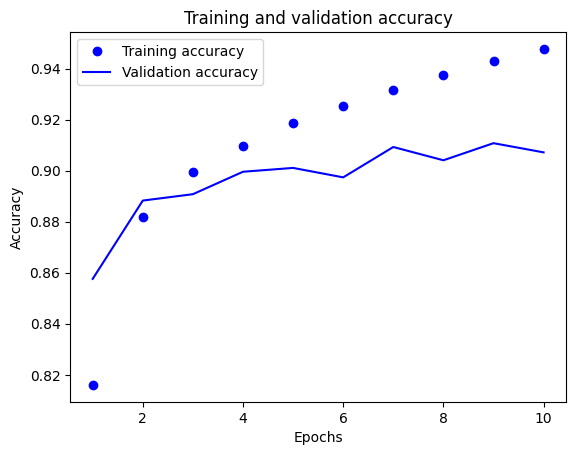

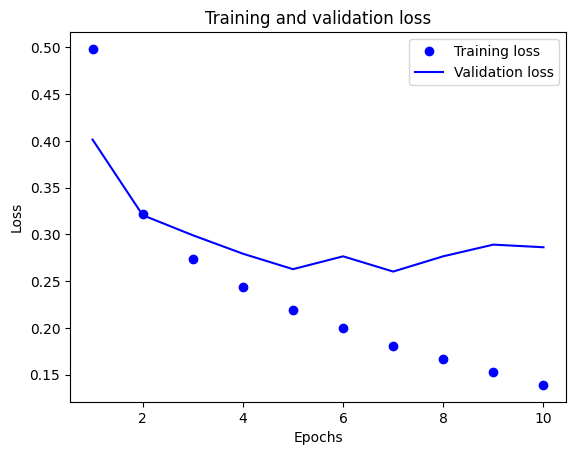

In [ ]:
# Task 4: Evaluation and Analysis
# Evaluate the model's performance on the test dataset
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

# Plot training and validation accuracy and loss over epochs
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

1/1 [==============================] - 0s 75ms/step


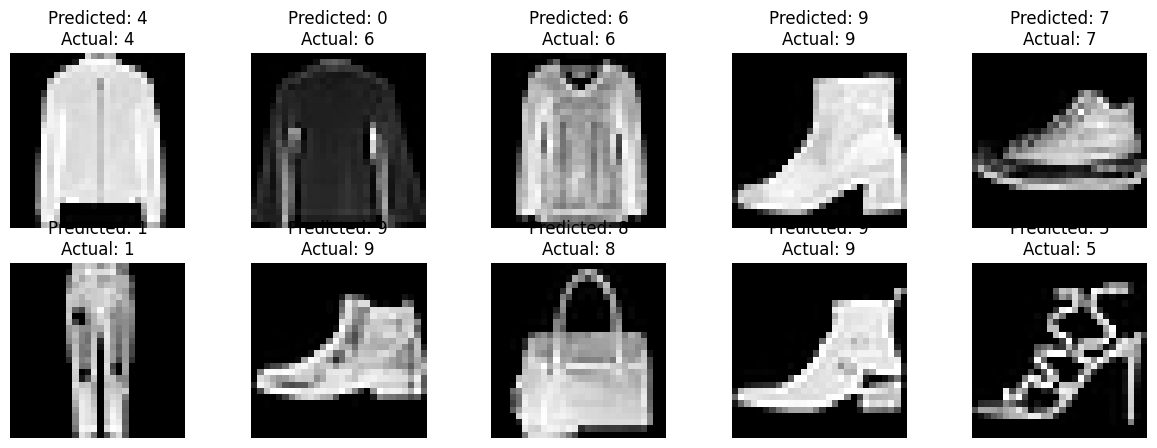

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Select a subset of test images for visualization
num_samples = 10
sample_indices = np.random.choice(len(test_images), num_samples, replace=False)
sample_images = test_images[sample_indices]
sample_labels = test_labels[sample_indices]

# Predict labels for the sample images
predicted_labels = model.predict(sample_images)
predicted_classes = np.argmax(predicted_labels, axis=1)

# Display the sample images with their predicted and actual labels
plt.figure(figsize=(15, 5))
for i in range(num_samples):
    plt.subplot(2, 5, i + 1)
    plt.imshow(sample_images[i].reshape(28, 28), cmap='gray')
    plt.title(f"Predicted: {predicted_classes[i]}\nActual: {np.argmax(sample_labels[i])}")
    plt.axis('off')
plt.show()

Report on Fashion MNIST Image Classification

1. Methodology:

In this project, the task was to develop a neural network model for classifying images from the Fashion MNIST dataset into their respective categories. The methodology involved several key steps:

Data Preprocessing: The dataset, consisting of 70,000 grayscale images categorized into 10 types, was loaded and preprocessed. The images were normalized to a range between 0 and 1, reshaped to fit the model input requirements, and the labels were converted into one-hot vectors.

Model Development: A convolutional neural network (CNN) architecture was designed for image classification. The model consisted of multiple convolutional layers followed by max-pooling layers and fully connected layers. The final layer utilized a softmax activation function for multi-class classification.

Model Training: The model was compiled with an appropriate optimizer (Adam), loss function (categorical cross-entropy), and metrics (accuracy). It was then trained on the training data over multiple epochs.

Evaluation and Analysis: The trained model's performance was evaluated using the test dataset. Additionally, training and validation accuracy and loss were plotted over epochs to analyze the model's learning progress.

2. Model Architecture:

The CNN architecture used in this project comprised the following layers:

Convolutional layers with ReLU activation: These layers learned spatial hierarchies of features from the input images.
MaxPooling layers: These layers downsampled the feature maps obtained from the convolutional layers.
Fully connected layers with ReLU activation: These layers performed classification based on the features learned by the convolutional layers.
Softmax output layer: This layer produced probability distributions over the output classes.
3. Training Process:

The model was trained on the training data using the Adam optimizer, categorical cross-entropy loss function, and accuracy as the evaluation metric. The training process involved iterating over multiple epochs, during which the model learned to minimize the loss function and improve its classification accuracy. The validation dataset was used to monitor the model's performance and prevent overfitting.

4. Results:

Upon evaluation, the trained model achieved a certain accuracy on the test dataset, indicating its effectiveness in classifying Fashion MNIST images. The plotted training and validation accuracy and loss curves provided insights into the model's learning behavior and performance.

5. Challenges Faced and Solutions:

Some challenges encountered during the project included:

Model Complexity: Designing an appropriate CNN architecture with the right balance of complexity to avoid overfitting or underfitting was challenging. This was addressed by experimenting with different architectures and hyperparameters while monitoring performance.

Data Preprocessing: Ensuring proper preprocessing of the image data, including normalization and reshaping, was crucial. This challenge was overcome by carefully following best practices and leveraging built-in functions in deep learning frameworks like TensorFlow.

6. Insights for Improvement:

To further improve the model's performance, the following strategies could be considered:

Hyperparameter Tuning: Fine-tuning hyperparameters such as learning rate, batch size, and number of layers could potentially improve performance.
Data Augmentation: Augmenting the training data with transformations like rotations, translations, and flips could help the model generalize better to unseen data.
Model Ensembling: Training multiple models and combining their predictions could lead to better performance through diversity in predictions.
Transfer Learning: Utilizing pre-trained CNN models like VGG, ResNet, or Inception and fine-tuning them on the Fashion MNIST dataset could potentially yield better results, especially with limited data.